# Load packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

# Load raw data

In [2]:
prefix = 'right_eye_new_severity_CLEANED_WITH_11_12_maybe'

In [3]:
feature_names = [ line.rstrip('\n') for line in open( prefix + '_feature_names.txt' )]

In [4]:
raw = pd.DataFrame( columns=feature_names, data=np.load( prefix + '_data.npy' ) )
raw['side'] = [1]* len(raw)
n_samples, n_features = raw.shape
raw['group'] = [ int(i) for i in range( int(n_samples/8) ) for j in range( 8 ) ]
raw['actual'] = [ int(line.rstrip('\n')) for line in open( prefix + '_values.txt' )]
averagedr = pd.concat( [ g.mean(axis=0) for n, g in raw.groupby( 'group' ) ], 
                     axis=1, ignore_index=True).T
averagedr.drop('group', axis=1, inplace=True)

In [5]:
averagedr.actual.value_counts()

10.0    645
8.0     325
7.0     325
5.0     325
4.0     325
3.0     325
2.0     325
1.0     325
6.0     324
9.0     192
Name: actual, dtype: int64

In [6]:
sample_names = [ line.rstrip('\n') for line in open( prefix + '_sample_names.txt' )]

In [7]:
group_names = [ _.split('/')[2].rsplit('-', 1)[0] + '-LS.tiff' for i, _ in enumerate(sample_names) if i % 8 == 0 ]

In [8]:
averagedr['converted_file_name'] = group_names

In [9]:
prefix = 'left_eye_new_severity_CLEANED_WITH_11_12'

In [10]:
feature_names = [ line.rstrip('\n') for line in open( prefix + '_feature_names.txt' )]

In [11]:
raw = pd.DataFrame( columns=feature_names, data=np.load( prefix + '_data.npy' ) )
raw['side'] = [1]* len(raw)
n_samples, n_features = raw.shape
raw['group'] = [ int(i) for i in range( int(n_samples/8) ) for j in range( 8 ) ]
raw['actual'] = [ int(line.rstrip('\n')) for line in open( prefix + '_values.txt' )]
averagedl = pd.concat( [ g.mean(axis=0) for n, g in raw.groupby( 'group' ) ], 
                     axis=1, ignore_index=True).T
averagedl.drop('group', axis=1, inplace=True)

In [12]:
averagedl.actual.value_counts()

8.0     325
7.0     325
5.0     325
3.0     325
1.0     325
6.0     324
2.0     323
11.0    312
4.0     296
9.0     270
12.0    136
10.0    119
Name: actual, dtype: int64

In [13]:
sample_names = [ line.rstrip('\n') for line in open( prefix + '_sample_names.txt' )]

In [14]:
group_names = [ _.split('/')[2].rsplit('-', 1)[0] + '-LS.tiff' for i, _ in enumerate(sample_names) if i % 8 == 0 ]

In [15]:
averagedl['converted_file_name'] = group_names

In [16]:
averagedl.shape

(3405, 3622)

In [17]:
averagedr.shape

(3436, 3622)

In [18]:
averaged = pd.concat( ( averagedl, averagedr), axis=0 )

In [19]:
averaged.shape

(6841, 3622)

In [20]:
trait_db = pd.read_csv( '20170830_AREDS_DB.csv', index_col=0)

## Merge on converted file_name

In [21]:
trait_db = trait_db[ trait_db.SideLR == 'LS' ].copy()

In [22]:
trait_db.drop( 'SideLR', axis=1, inplace=True)

In [23]:
trait_db.head()

,Patid,Areds_subject_id,converted_file_name,Baseline_AMD_Category,Final_AMD_Phenotype_Group,Final_AMD_Phenotype,Final_Cataract_Phenotype,Study_Visit_Year,Treatment,age_baseline,male,white,Visit,EyeLR,SevScore,SimpleSev,age
0,51003,1890,51003-04-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2.0,Placebo,72.484932,0,1,4,LE,2.0,1.0,74.484932
2,51003,1890,51003-04-F2-RE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2.0,Placebo,72.484932,0,1,4,RE,2.0,1.0,74.484932
4,51003,1890,51003-06-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,3.0,Placebo,72.484932,0,1,6,LE,2.0,1.0,75.484932
6,51003,1890,51003-06-F2-RE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,3.0,Placebo,72.484932,0,1,6,RE,1.0,1.0,75.484932
8,51003,1890,51003-08-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,4.0,Placebo,72.484932,0,1,8,LE,3.0,1.0,76.484932


In [24]:
group_names[:5]

['51034-QUA-F2-LE-LS.tiff',
 '51046-06-F2-LE-LS.tiff',
 '51054-QUA-F2-LE-LS.tiff',
 '51064-QUA-F2-LE-LS.tiff',
 '51074-QUA-F2-LE-LS.tiff']

In [25]:
len(group_names)

3405

In [26]:
len(averaged)

6841

In [27]:
averaged = averaged.merge( trait_db, how='inner', on='converted_file_name' )

In [28]:
averaged.SevScore.value_counts()

8.0     650
5.0     650
3.0     650
1.0     650
7.0     649
6.0     647
2.0     647
11.0    634
4.0     619
9.0     459
10.0    298
12.0    278
Name: SevScore, dtype: int64

In [29]:
averaged.columns[:3619]

Index(['Edge Features () [0]', 'Edge Features () [1]', 'Edge Features () [2]',
       'Edge Features () [3]', 'Edge Features () [4]', 'Edge Features () [5]',
       'Edge Features () [6]', 'Edge Features () [7]', 'Edge Features () [8]',
       'Edge Features () [9]',
       ...
       'Fractal Features (Wavelet (Edge ())) [16]',
       'Fractal Features (Wavelet (Edge ())) [17]',
       'Fractal Features (Wavelet (Edge ())) [18]',
       'Fractal Features (Wavelet (Edge ())) [19]',
       'Pixel Intensity Statistics (Wavelet (Edge ())) [0]',
       'Pixel Intensity Statistics (Wavelet (Edge ())) [1]',
       'Pixel Intensity Statistics (Wavelet (Edge ())) [2]',
       'Pixel Intensity Statistics (Wavelet (Edge ())) [3]',
       'Pixel Intensity Statistics (Wavelet (Edge ())) [4]',
       'Gini Coefficient (Wavelet (Edge ())) [0]'],
      dtype='object', length=3619)

In [30]:
averaged.SevScore.value_counts()

8.0     650
5.0     650
3.0     650
1.0     650
7.0     649
6.0     647
2.0     647
11.0    634
4.0     619
9.0     459
10.0    298
12.0    278
Name: SevScore, dtype: int64

In [31]:
X = averaged.iloc[:,:3619]
Y = list(averaged.SevScore.astype(int))

In [32]:
Counter(Y)

Counter({1: 650,
         2: 647,
         3: 650,
         4: 619,
         5: 650,
         6: 647,
         7: 649,
         8: 650,
         9: 459,
         10: 298,
         11: 634,
         12: 278})

In [33]:
import time

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Support Vector Classifier

In [38]:
steps = []
steps.append( ('standardize', StandardScaler() ) )
steps.append( ('svc', SVC( class_weight='balanced') ) )
svc_model = Pipeline( steps )

In [39]:
cv_strategy = KFold( n_splits=8, shuffle=True, random_state=42)

In [38]:

fine_grain_parameters = {'svc__C': [ 2**1, 2**1.5, 2**2, 2**2.5, 2**3, 2**3.5, 2**4.0, 2*4.5, 2*5 ],
              'svc__gamma':[ 2**(-12), 2**(-11.5), 2**(-11), 2**(-10.5), 2**(-10), 
                            2**(-9.5), 2**(-9), 2**(-8.5), 2**(-8), 2**(-7.5)]}

In [39]:
scorers = ['accuracy', 'r2' ]
grid_search_kwargs = \
{
    'estimator' : svc_model,
    'param_grid' : fine_grain_parameters,
    "scoring" : scorers,
    "n_jobs" : 16,
    "pre_dispatch" : 16,
    "cv" : cv_strategy,
    "refit" : False
}

In [40]:
clf = GridSearchCV( **grid_search_kwargs )

In [ ]:
t0 = time.time()
clf.fit( X, Y)
t1 = time.time()
print( "took {:0.1f}min".format( (t2-t1)/60 ) )

accuracy 0.0873956960913 0.281803542673
r2 -0.805511417653 0.390719217211


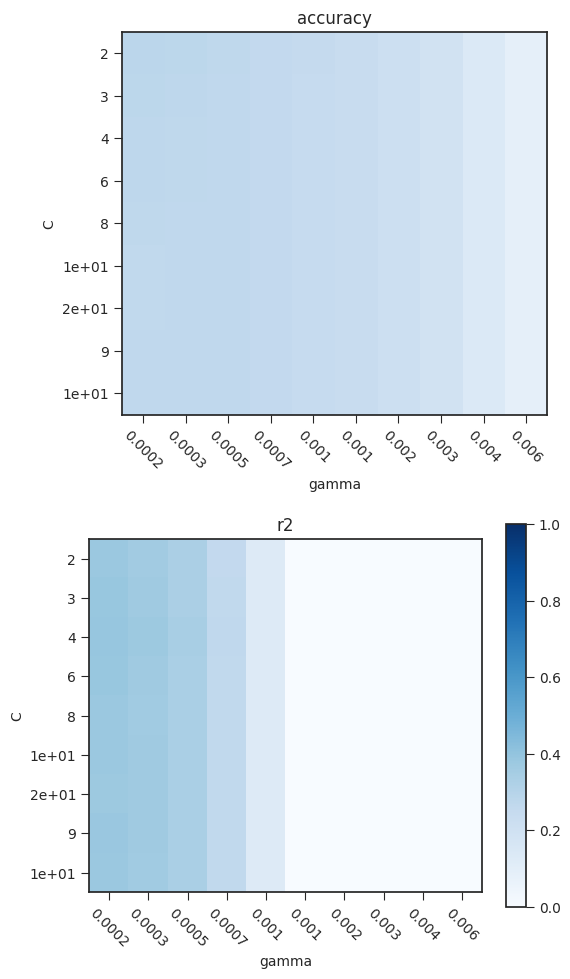

In [44]:
sns.set_style(style='ticks')
fig, axes = plt.subplots( nrows=2, ncols=1, figsize=(6,10), dpi=100, squeeze=True )

col_labels = np.array( clf.cv_results_['param_svc__gamma'] ).reshape( (9,10) )[0]
row_labels = np.array( clf.cv_results_['param_svc__C'] ).reshape( (9,10) )[:,0]
for scorer_name, ax in zip( scorers, axes.flatten() ):
    
    key = 'mean_test_' + scorer_name
    result = clf.cv_results_[ key ].copy().reshape( (9,10))
    print( scorer_name, result.min(), result.max() )
    mpl_im_obj = ax.imshow( result,  cmap=plt.cm.Blues, vmin=0, vmax=1)# interpolation='nearest',
    ax.set_title( scorer_name )
    ax.set_yticks( list( range( len( row_labels ) ) ) )
    ax.set_xticks( list( range( len( col_labels ) ) ) )
    ax.set_yticklabels( [ "{:0.1g}".format(_) for _ in row_labels ] )
    ax.set_xticklabels( [ "{:0.1g}".format(_) for _ in col_labels ], rotation=-45)
    ax.set_ylabel( 'C' )
    ax.set_xlabel( 'gamma')
fig.colorbar(mpl_im_obj, orientation='vertical' )
fig.tight_layout()

# Retrain SVC Classifier with best params

In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
steps = []
steps.append( ('standardize', StandardScaler() ) )
# ROC AUC curve metric requires probabilities
steps.append( ('svc', SVC(C=4, gamma=2**(-12), class_weight='balanced') ) )
svc_model = Pipeline( steps )

In [40]:
y_pred_svc = cross_val_predict( svc_model, X, Y, cv=cv_strategy, 
                              method='predict', n_jobs=8 )

# Classifier Metrics
## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix( Y, y_pred_svc )

In [43]:
cm

array([[410,  57,  62,  62,  26,   6,   5,   4,   2,   0,  16,   0],
       [221,  81, 145,  72,  62,  20,   4,  19,   6,   2,  13,   2],
       [196,  59, 172,  65,  71,  33,   6,  23,   3,   1,  16,   5],
       [178,  60, 109,  85,  84,  35,  12,  19,   6,   0,  21,  10],
       [130,  45, 121,  72,  81,  68,  28,  59,   9,   4,  25,   8],
       [ 84,  29,  91,  55,  85,  81,  77,  77,  31,   2,  27,   8],
       [ 43,  14,  45,  23,  54,  91, 147, 121,  65,  10,  23,  13],
       [ 32,  15,  38,  43,  61,  71,  71, 171,  89,  24,  22,  13],
       [  7,   2,  15,  12,  21,  24,  57,  77, 133,  54,  32,  25],
       [  3,   2,   3,   4,   6,   9,  25,  36,  67,  48,  45,  50],
       [ 43,   2,  10,  13,  14,  23,  28,  30,  27,  16, 383,  45],
       [  0,   0,   2,   3,   0,   5,  10,  19,  26,  28,  61, 124]])

In [44]:
result = pd.DataFrame(data=cm)#.to_latex()

In [45]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'CGA', 'NeoAMD', 'NeoAMD + CGA']

In [46]:
result.index = labels

In [47]:
result.columns = labels

In [48]:
result.loc[ 'Total', :] = result.sum(axis=0)

In [49]:
result.loc[:, 'Total'] = result.sum(axis=1)

In [50]:
result = result.astype(int)

In [51]:
result

,1,2,3,4,5,6,7,8,9,CGA,NeoAMD,NeoAMD + CGA,Total
1,410,57,62,62,26,6,5,4,2,0,16,0,650
2,221,81,145,72,62,20,4,19,6,2,13,2,647
3,196,59,172,65,71,33,6,23,3,1,16,5,650
4,178,60,109,85,84,35,12,19,6,0,21,10,619
5,130,45,121,72,81,68,28,59,9,4,25,8,650
6,84,29,91,55,85,81,77,77,31,2,27,8,647
7,43,14,45,23,54,91,147,121,65,10,23,13,649
8,32,15,38,43,61,71,71,171,89,24,22,13,650
9,7,2,15,12,21,24,57,77,133,54,32,25,459
CGA,3,2,3,4,6,9,25,36,67,48,45,50,298


In [52]:
print( result.to_latex() )

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &     1 &    2 &    3 &    4 &    5 &    6 &    7 &    8 &    9 &  CGA &  NeoAMD &  NeoAMD + CGA &  Total \\
\midrule
1            &   410 &   57 &   62 &   62 &   26 &    6 &    5 &    4 &    2 &    0 &      16 &             0 &    650 \\
2            &   221 &   81 &  145 &   72 &   62 &   20 &    4 &   19 &    6 &    2 &      13 &             2 &    647 \\
3            &   196 &   59 &  172 &   65 &   71 &   33 &    6 &   23 &    3 &    1 &      16 &             5 &    650 \\
4            &   178 &   60 &  109 &   85 &   84 &   35 &   12 &   19 &    6 &    0 &      21 &            10 &    619 \\
5            &   130 &   45 &  121 &   72 &   81 &   68 &   28 &   59 &    9 &    4 &      25 &             8 &    650 \\
6            &    84 &   29 &   91 &   55 &   85 &   81 &   77 &   77 &   31 &    2 &      27 &             8 &    647 \\
7            &    43 &   14 &   45 &   23 &   54 &   91 &  147 &  121 &   65 &   10 &      23 &           

In [53]:
cm_normal = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

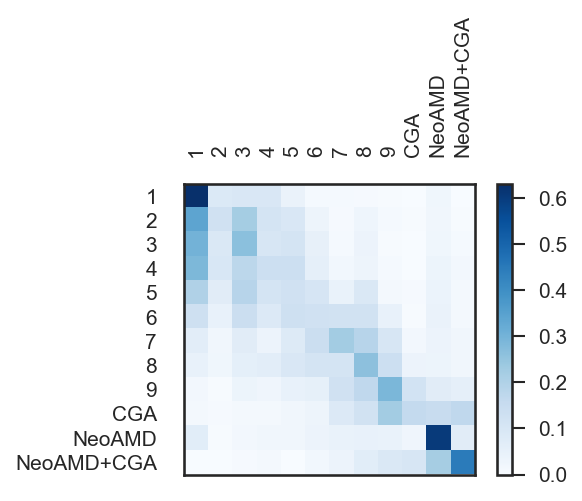

In [54]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style(style='ticks')
fig = plt.figure( figsize=(4,3.5), dpi=150 )
ax = fig.gca()
mpl_im_obj = ax.imshow( cm_normal, interpolation='nearest', cmap=plt.cm.Blues)
#ax.set_title( "Both Eyes 12-class SVC" )
ax.tick_params( axis='x', rotation=90, labeltop='on', labelbottom='off')
ax.set_yticks( list( range(0,12) ) )
ax.set_xticks( list( range(0,12) ) )
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
labels = [str(_) for _ in range(1,10)]+ ['CGA', 'NeoAMD', "NeoAMD+CGA"]
ax.set_xticklabels( labels )
ax.set_yticklabels( labels )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
fig.colorbar( mpl_im_obj, cax=cax, orientation='vertical' )
fig.tight_layout()
fig.savefig( 'paper/images/both_eyes_12_class_svc_cm_cv.pdf' )

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(Y, y_pred_svc )

0.32940513505699509

# Diagonals

## Full agreement

In [57]:
np.diag(cm).sum()

1916

In [58]:
np.diag(cm).sum() / cm.sum()

0.28048601961645442

## One-off diagonal

In [59]:
one_off_diag_locations = (np.eye( *cm.shape, k=-1).astype(bool) | 
 np.eye( *cm.shape, k=0).astype(bool) | 
 np.eye( *cm.shape, k=1).astype(bool))

In [60]:
cm[ one_off_diag_locations ].sum()

3695

In [61]:
cm[ one_off_diag_locations ].sum() / cm.sum()

0.54091641048162786

## Two-off diagonal

In [64]:
two_off_diag_locations = ( one_off_diag_locations | 
 np.eye( *cm.shape, k=-2).astype(bool) | 
 np.eye( *cm.shape, k=2).astype(bool))

In [65]:
cm[ two_off_diag_locations ].sum()

4916

In [66]:
cm[ two_off_diag_locations ].sum() / cm.sum()

0.71966037183428488

## Cohen's Kappa

# TBD

# Regression Problem

In [67]:
from sklearn.svm import SVR

In [68]:
steps = []
steps.append( ('standardize', StandardScaler() ) )
steps.append( ('svc', SVR( C=4, gamma=2**(-12) ) ) )
svr_model = Pipeline( steps )

In [69]:
t1 = time.time()
y_pred_svr = cross_val_predict( svr_model, X, Y, cv=cv_strategy, 
                              method='predict', n_jobs=8 )
t2 = time.time()
print( "took {:0.1f}min".format( (t2-t1)/60 ) )

took 7.4min


In [70]:
with open( 'both_sides_12_class_svr_y_pred.txt', 'w' ) as f:
    for a, b in zip( Y, y_pred_svr ):
        f.write( '{}\t{}\n'.format( a, b ) )

In [71]:
r2_score(Y, y_pred_svr)

0.5785218574957296

In [72]:
averaged.shape

(6831, 3638)

In [73]:
len(y_pred_svr)

6831

In [74]:
averaged['svc_pred'] = y_pred_svc

In [75]:
averaged['svr_pred'] = y_pred_svr
averaged[ 'svr_residual' ] = averaged['svr_pred'] - averaged['SevScore']

In [76]:
averaged.columns

Index(['Edge Features () [0]', 'Edge Features () [1]', 'Edge Features () [2]',
       'Edge Features () [3]', 'Edge Features () [4]', 'Edge Features () [5]',
       'Edge Features () [6]', 'Edge Features () [7]', 'Edge Features () [8]',
       'Edge Features () [9]',
       ...
       'male', 'white', 'Visit', 'EyeLR', 'SevScore', 'SimpleSev', 'age',
       'svc_pred', 'svr_pred', 'svr_residual'],
      dtype='object', length=3641)

In [77]:
averaged['sex'] = pd.Categorical.from_codes( codes=averaged['male'], categories=['female', 'male'] )

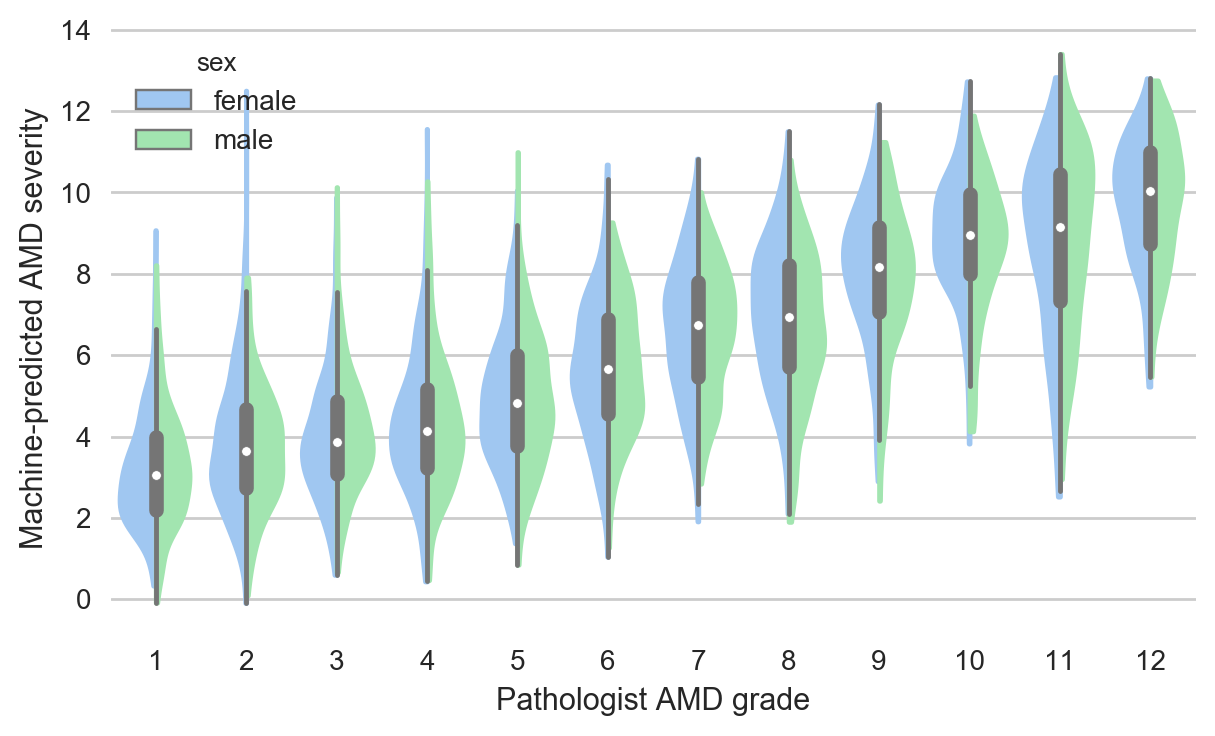

In [78]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
fig = plt.figure( figsize=(7,4), dpi=200 )
ax = fig.gca()
#ax.set_yticks( list( range( -10, 12, 2) ) )
sns.violinplot( x='SevScore', y='svr_pred',hue="sex", data=averaged, ax=ax, cut=0, split=True) #scale='width',
#ax.set_xticks( list( range(0,13) ) )
ax.set_xticklabels( [str(_) for _ in range(1,13)] )
#ax.set_title( "Residual vs. Actual, Left Eye 12-class SVR" )
ax.set_xlabel( "Pathologist AMD grade")
ax.set_ylabel( "Machine-predicted AMD severity")
sns.despine(left=True, bottom=True)
fig.savefig( 'paper/images/both_sides_12_class_svr_pred_vs_act.pdf' )